In [40]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.random.seed(3)

In [41]:
def generate_oe_matrix(variance_threshold_L = 0.85, variance_threshold_U = 1):
    """Generates a random 5x5 symmetric matrix with positive values and
       the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(5, 5) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = np.corrcoef(oe)
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

0.9290663602151771 

[[20.26367 19.71099 21.56335 12.70008 25.12474]
 [19.71099 16.91667 31.94627  7.55831 28.1381 ]
 [21.56335 31.94627  3.94829 28.3884   8.29234]
 [12.70008  7.55831 28.3884   8.75893 37.08606]
 [25.12474 28.1381   8.29234 37.08606  9.67577]] 



#### Perform PCA on the Pearson correlation matrix <br>

In [42]:
n = len(corr_oe_zero[0])
x_t = np.transpose(corr_oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [43]:
print('explained variances')
print(explained_variances, '\n')
# print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
# print((V_Cx > 0) == (Vh > 0), '\n')

print("V")
print(V_Cx, '\n')
# print(V_Cx > 0, '\n')
print("P")
print(Vh, '\n')
# print(Vh > 0, '\n')

explained variances
[0.99416 0.00499 0.00085 0.00001 0.     ] 

V
[[-1.5971  -1.78503  1.73771 -1.72817  1.82687]
 [ 0.01396  0.00426  0.01008 -0.008   -0.00079]
 [ 0.00125 -0.00178  0.00087  0.00226  0.00066]
 [ 0.00001 -0.00001 -0.00002 -0.00001  0.00002]
 [ 0.       0.      -0.       0.      -0.     ]] 

P
[[-0.41126 -0.45966  0.44747 -0.44501  0.47043]
 [ 0.71687  0.21873  0.51765 -0.41068 -0.04044]
 [ 0.3762  -0.53669  0.26092  0.68008  0.19964]
 [ 0.40859 -0.20806 -0.66489 -0.28642  0.5154 ]
 [ 0.09208 -0.63996 -0.14712 -0.29793 -0.6867 ]] 



In [44]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n') 

corr_oe
[[ 1.       0.8759  -0.6746   0.7716  -0.87243]
 [ 0.8759   1.      -0.89708  0.83968 -0.9866 ]
 [-0.6746  -0.89708  1.      -0.92244  0.93153]
 [ 0.7716   0.83968 -0.92244  1.      -0.9153 ]
 [-0.87243 -0.9866   0.93153 -0.9153   1.     ]] 

V_Cx[0]
[-1.5971  -1.78503  1.73771 -1.72817  1.82687] 

Vh[0]
[-0.41126 -0.45966  0.44747 -0.44501  0.47043] 

cov_x
[[ 0.66732  0.7365  -0.70711  0.70585 -0.75164]
 [ 0.7365   0.8224  -0.79701  0.79141 -0.84027]
 [-0.70711 -0.79701  0.78303 -0.77685  0.81723]
 [ 0.70585  0.79141 -0.77685  0.77388 -0.81222]
 [-0.75164 -0.84027  0.81723 -0.81222  0.85959]] 

cov_x_sum
[3.5684141120806556, 3.987580841220182, 3.8812334273752245, 3.8602050134243076, 4.080945986889852] 



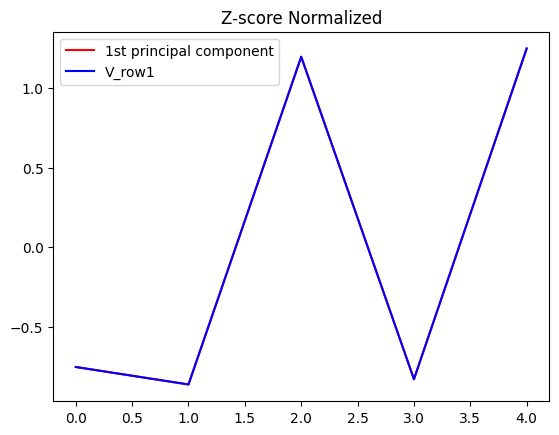

In [45]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
# plt.plot(cov_x_selected_Norm, c="black")


plt.title("Z-score Normalized")
plt.legend(["1st principal component", "V_row1"])

In [46]:
plt.clf()

<Figure size 640x480 with 0 Axes>

### Check the plot without Normalization on the Pearson correlation matrix

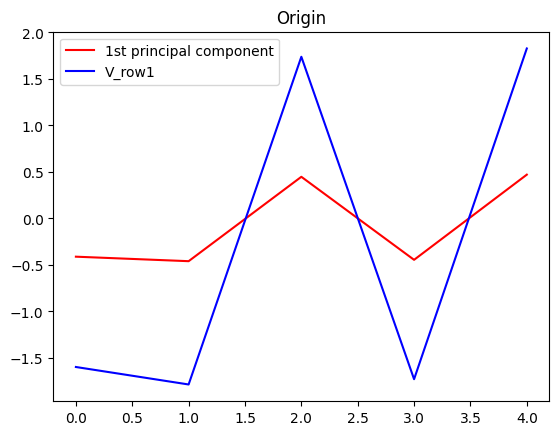

In [47]:

plt.plot(Vh[0], c="red")
plt.plot(V_Cx[0], c="blue")
# plt.plot(cov_x_selected, c="black")

plt.title("Origin")
plt.legend(["1st principal component", "V_row1"])

In [48]:
plt.clf()

<Figure size 640x480 with 0 Axes>

#### Heatmap plot

<Axes: >

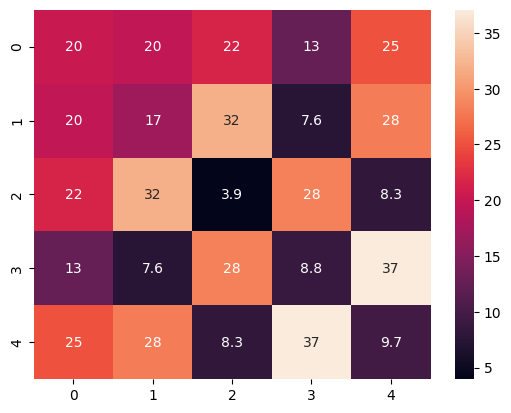

In [49]:
sns.heatmap(oe, annot=True)

<Axes: >

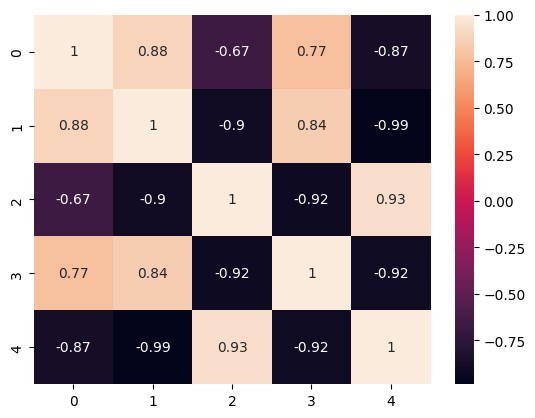

In [50]:
sns.heatmap(corr_oe, annot=True)

In [51]:
# sns.heatmap(corr_oe_zero, annot=True)

<Axes: >

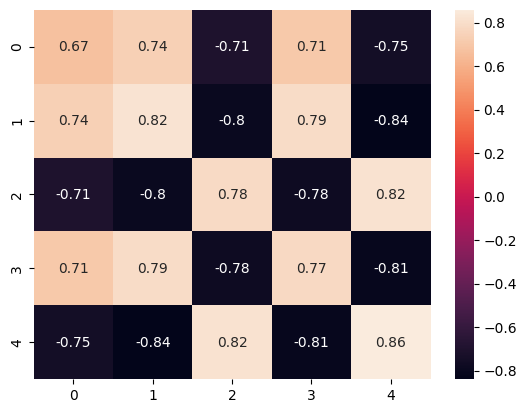

In [52]:
sns.heatmap(cov_x, annot=True)